In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# train_test_split

[array([[6.08905019]]), array([[7.56093645]]), array([[7.5717853]]), array([[6.65905228]]), array([[8.44735268]]), array([[9.13583602]]), array([[7.83027461]]), array([[4.58627549]]), array([[4.77543338]]), array([[6.38945626]]), array([[4.98678363]]), array([[8.24306263]]), array([[8.07308012]]), array([[10.05794105]]), array([[6.80314278]]), array([[6.90703645]]), array([[8.79017446]]), array([[8.15394141]]), array([[5.95973393]]), array([[8.89372789]])]


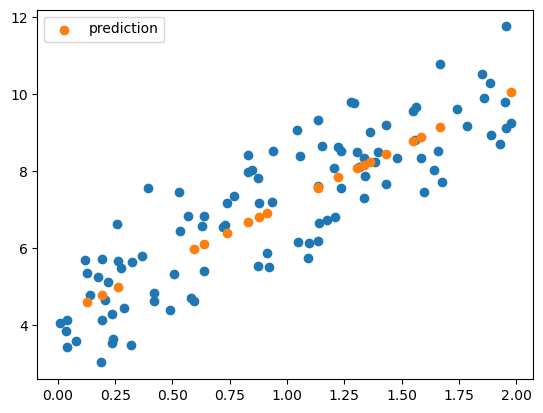

In [4]:
#set random reproducibility
np.random.seed(0)
#generate random data
X=2*np.random.rand(100,1)
y=4+3*X+np.random.randn(100,1)
#split the data into training and testing sets
X_trainL,X_testL,y_trainL,y_testL=train_test_split(X,y,test_size=0.2,random_state=1)
#train the linear regression model
model=LinearRegression()
model.fit(X_trainL,y_trainL)
pred_y_testL=[model.predict(np.array([x]))for x in X_testL]
print(pred_y_testL)

plt.scatter(X,y)
plt.scatter(X_testL,pred_y_testL,label='prediction')
plt.legend()

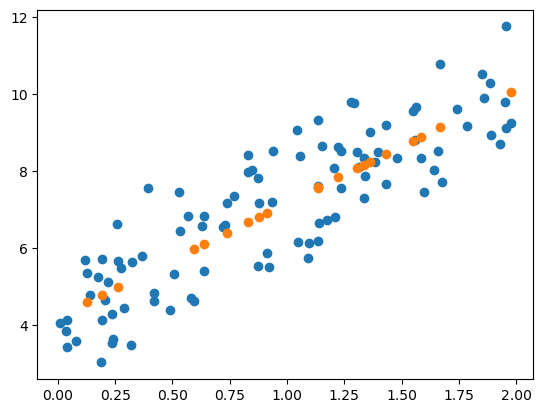

In [5]:
plt.scatter(X,y)
plt.scatter(X_testL,pred_y_testL)

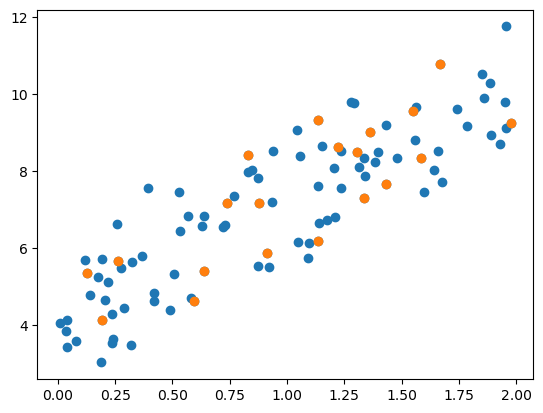

In [6]:
plt.scatter(X,y)
plt.scatter(X_testL,y_testL)

# Categorical Feature Encoding

In [7]:
import pandas as pd

In [8]:
data={"Country":['India','Japan','USA','China','India','USA'],
     "Age":[23,34,55,43,64,56],
     "Salary":[72000,80000,34000,56000,78000,49000]}

In [9]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df=pd.DataFrame(data,columns=["Country","Age","Salary"])
#df['Country']=label_encoder.fit_transform(df['Country'])
label_encoder.fit_transform(df['Country'])

array([1, 2, 3, 0, 1, 3])

In [10]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df=pd.DataFrame(data,columns=["Country","Age","Salary"])
df['Country']=label_encoder.fit_transform(df['Country'])
df

,Country,Age,Salary
0,1,23,72000
1,2,34,80000
2,3,55,34000
3,0,43,56000
4,1,64,78000
5,3,56,49000


In [11]:
d=pd.DataFrame(["India","China","USA","Japan"])
label_encoder.transform(d)

D:\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 0, 3, 2])

In [12]:
d=pd.DataFrame(["India","China","USA","Japan","Germany"])
label_encoder.fit_transform(d)

D:\ANACONDA\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 4, 3, 1])

In [13]:
onehotencoder=preprocessing.OneHotEncoder()
x=onehotencoder.fit_transform(df.Country.values.reshape(-1,1)).toarray()
x.shape[1]

4

In [14]:
dfOneHot=pd.DataFrame(x,columns=["Country_"+str(int(i)) for i in range(x.shape[1])],dtype='Int64')
df=pd.concat([df,dfOneHot],axis=1)
df=df.drop(["Country"],axis=1)
df

,Age,Salary,Country_0,Country_1,Country_2,Country_3
0,23,72000,0,1,0,0
1,34,80000,0,0,1,0
2,55,34000,0,0,0,1
3,43,56000,1,0,0,0
4,64,78000,0,1,0,0
5,56,49000,0,0,0,1


In [15]:
df=pd.DataFrame(data,columns=["Country","Age","Salary"])
one_hot_encoded_data=pd.get_dummies(df,columns=['Country'])
one_hot_encoded_data

,Age,Salary,Country_China,Country_India,Country_Japan,Country_USA
0,23,72000,False,True,False,False
1,34,80000,False,False,True,False
2,55,34000,False,False,False,True
3,43,56000,True,False,False,False
4,64,78000,False,True,False,False
5,56,49000,False,False,False,True


In [16]:
import numpy as np

In [17]:
df_scaled=df.copy()
min_max_normalizer=preprocessing.MinMaxScaler()
columns=["Age","Salary"]
for columns in columns:
    df_scaled[columns]=min_max_normalizer.fit_transform(np.array(df_scaled[columns]).reshape(-1,1))
display(df_scaled)

,Country,Age,Salary
0,India,0.000000,0.826087
1,Japan,0.268293,1.000000
2,USA,0.780488,0.000000
3,China,0.487805,0.478261
4,India,1.000000,0.956522
5,USA,0.804878,0.326087


In [18]:
df_scaled=df.copy()
z_normalizer=preprocessing.StandardScaler()
columns=["Age","Salary"]
for columns in columns:
    df_scaled[columns]=z_normalizer.fit_transform(np.array(df_scaled[columns]).reshape(-1,1))
display(df_scaled)

,Country,Age,Salary
0,India,-1.623492,0.629843
1,Japan,-0.841372,1.109723
2,USA,0.651767,-1.649588
3,China,-0.201455,-0.329918
4,India,1.291683,0.989753
5,USA,0.722869,-0.749813


In [19]:
df_scaled=df.copy()
mabs_scaler=preprocessing.MaxAbsScaler()
columns=["Age","Salary"]
for columns in columns:
    df_scaled[columns]=mabs_scaler.fit_transform(np.array(df_scaled[columns]).reshape(-1,1))
display(df_scaled)

,Country,Age,Salary
0,India,0.359375,0.9000
1,Japan,0.531250,1.0000
2,USA,0.859375,0.4250
3,China,0.671875,0.7000
4,India,1.000000,0.9750
5,USA,0.875000,0.6125


# Dataset Splitting

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#creating a synthetic imbalanced dataset
np.random.seed(42)
X=np.random.rand(100, 2)
X


array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914],
       [0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249],
       [0.12203823, 0.49517691],
       [0.03438852, 0.9093204 ],
       [0.25877998, 0.66252228],
       [0.31171108, 0.52006802],
       [0.54671028, 0.18485446],
       [0.96958463, 0.77513282],
       [0.93949894, 0.89482735],
       [0.59789998, 0.92187424],
       [0.0884925 , 0.19598286],
       [0.04522729, 0.32533033],
       [0.

In [21]:
y=np.random.choice([0,1],100,p=[0.9,0.1]) #imbalanced labels with 90%
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y)
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y==0)}, Class1: {np.sum(y==1)}\n")
print()
print("Training set Class Distribution:")
print(f"Class 0: {np.sum(y_train==0)}, Class1: {np.sum(y_train==1)}\n")
print()
print("Test set Class Distribution:")
print(f"Class 0: {np.sum(y_test==0)}, Class1: {np.sum(y_test==1)}\n")


Original Class Distribution:
Class 0: 90, Class1: 10


Training set Class Distribution:
Class 0: 63, Class1: 7


Test set Class Distribution:
Class 0: 27, Class1: 3



In [23]:
X_train,X_temp,y_train,y_temp=train_test_split(X,y,train_size=0.6,stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,stratify=y_temp)
print("Original Class Distribution:")
print(f"Class 0: {np.sum(y==0)}, Class1: {np.sum(y==1)}\n")
print()
print("Training set Class Distribution:")
print(f"Class 0: {np.sum(y_train==0)}, Class1: {np.sum(y_train==1)}\n")
print()
print("Validation set class Distribution")
print(f"Class 0: {np.sum(y_val==0)}, Class1: {np.sum(y_val==1)}\n")
print()
print("Test set Class Distribution:")
print(f"Class 0: {np.sum(y_test==0)}, Class1: {np.sum(y_test==1)}\n") 

Original Class Distribution:
Class 0: 90, Class1: 10


Training set Class Distribution:
Class 0: 54, Class1: 6


Validation set class Distribution
Class 0: 18, Class1: 2


Test set Class Distribution:
Class 0: 18, Class1: 2



# K Fold

In [24]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut

In [25]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for i,(train_index,val_index) in enumerate(skf.split(X,y)):
    X_train,X_val=X[train_index],X[val_index]
    y_train,y_val=y[train_index],y[val_index]
    print(f"Fold{i}:")
    print(f" Train: index={train_index}")
    print(f" Test: index={val_index}")

Fold0:
 Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23 24 25
 27 28 29 30 31 32 33 34 35 36 37 38 40 42 43 44 45 46 47 48 49 50 52 53
 54 56 57 58 59 60 61 62 63 64 65 69 70 71 72 73 74 76 78 80 81 83 84 85
 86 88 89 92 93 95 97 99]
 Test: index=[16 17 26 39 41 51 55 66 67 68 75 77 79 82 87 90 91 94 96 98]
Fold1:
 Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19 20 22 23 26 27 28
 29 30 32 33 36 37 38 39 40 41 43 44 45 48 49 50 51 52 54 55 56 57 59 60
 61 62 63 64 66 67 68 69 70 72 73 74 75 76 77 78 79 82 85 87 88 89 90 91
 92 93 94 95 96 97 98 99]
 Test: index=[11 13 21 24 25 31 34 35 42 46 47 53 58 65 71 80 81 83 84 86]
Fold2:
 Train: index=[ 0  1  3  4  5  6 11 12 13 15 16 17 18 19 21 22 24 25 26 28 29 30 31 34
 35 36 38 39 40 41 42 43 44 45 46 47 48 49 50 51 53 54 55 57 58 59 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 86 87 88 89 90
 91 92 93 94 95 96 97 98]
 Test: index=[ 2  7  8  9 10 14 20 23 27 32 33 37 52

In [26]:
#l=["a","b"]
#for i,j in enumerate(l):
   # print(i,j)

In [27]:
loo=LeaveOneOut()
for i,(train_index,val_index) in enumerate(loo.split(X)):
    X_train,X_val=X[train_index],X[val_index]
    y_train,y_val=y[train_index],y[val_index]
    print(f"Fold{i}:")
    print(f" Train: index={train_index}")
    print(f" Test: index={val_index}")

Fold0:
 Train: index=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
 Test: index=[0]
Fold1:
 Train: index=[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 98 99]
 Test: index=[1]
Fold2:
 Train: index=[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96
 97 9

# MULTIPLE LINEAR REGRESSION



In [28]:
x=np.random.rand(100,2)
y=np.dot(x,np.array([20,30]))+10
model=LinearRegression()

In [29]:
model.fit(x,y)

LinearRegression()

In [30]:
model.coef_

array([20., 30.])

In [31]:
model.intercept_

10.000000000000007

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [33]:
train_model=LinearRegression()

In [34]:
train_model.fit(x,y)

LinearRegression()

In [35]:
train_model.coef_

array([20., 30.])

In [36]:
train_model.intercept_

10.000000000000007

In [37]:
import numpy as np
x1=([1,1,1],[1,1,2],[1,2,1],[1,1,3])
y=[14,19,16,24]

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
model=LinearRegression()

In [40]:
model.fit(x1,y)

LinearRegression()

In [41]:
model.coef_

array([0., 2., 5.])

In [42]:
model.intercept_

7.000000000000007

In [43]:
model.predict([[1,2,2]])

array([21.])

# Normal Equation to solve Linear Regression

In [44]:
import matplotlib.pyplot as plt
def add_bias_variable(x):
    n=x.shape[0]
    x_b=np.concatenate((np.ones((n,1)),x),axis=1)
    return x_b

In [45]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
x=np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=1)
x_train_b=add_bias_variable(x_train)
x_test_b=add_bias_variable(x_test)

In [46]:
x_transpose=np.transpose(x_train_b)
x_transpose_x=np.dot(x_transpose,x_train_b)
x_transpose_y=np.dot(x_transpose,y_train)
theta_normal=np.dot(np.linalg.inv(x_transpose_x),x_transpose_y)
print(theta_normal)

[[3.86388375]
 [3.30202898]]


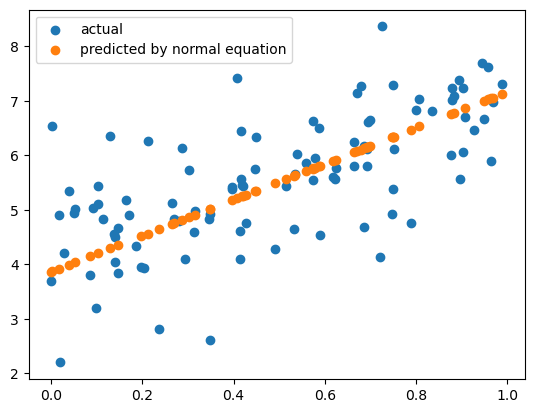

In [47]:
y_predicted=[np.dot(x_test_b[i],theta_normal) for i in range(x_test.shape[0])]
plt.scatter(x,y,label='actual')
plt.scatter(x_test,y_predicted,label='predicted by normal equation')
plt.legend()
plt.show()

# POLYNOMIAL REGRESSION

In [52]:
import numpy as np
np.random.seed(0)
true_coefficent=[4,2,-3,5]
x=np.random.rand(100,1)
y=true_coefficent[0]*x**3+true_coefficent[1]*x**2+true_coefficent[2]*x+true_coefficent[3]
y+=np.random.normal(scale=0.5,size=y.shape)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)
degree=2
x_train_new=np.column_stack([x_train** i for i in range(degree+1)])
x_test_new=np.column_stack([x_test** i for i in range(degree+1)])
x_transpose=np.transpose(x_train_new)
x_transpose_x=np.dot(x_transpose,x_train_new)
x_transpose_y=np.dot(x_transpose,y_train)
theta_normal=np.dot(np.linalg.inv(x_transpose_x),x_transpose_y)

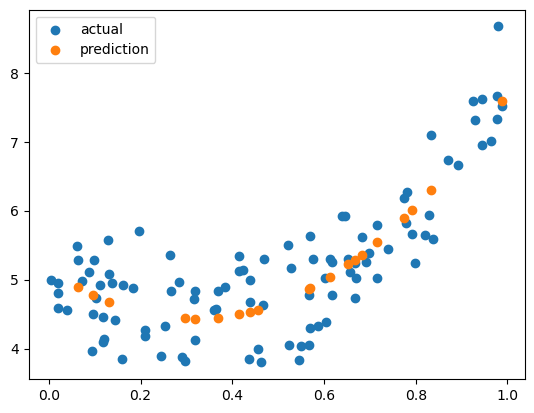

Satyanistha Das


In [55]:
y_predicted=[np.dot(x_test_new[i],theta_normal) for i in range(x_test_new.shape[0])]
plt.scatter(x,y,label='actual')
plt.scatter(x_test,y_predicted,label="prediction")
plt.legend()
plt.show()
print("Satyanistha Das")